## Settings

In [1]:
# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance.edgar_client import get_facts
from finance.fundamentals import annual_net_income, plot_annual_net_income, plot_net_income_growth
from finance.prices import historical_price

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
facts = get_facts(ticker='V')

## Income

In [3]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2020-09-30,10866000000,2020
14,2021-09-30,12311000000,2021
15,2022-09-30,14957000000,2022
16,2023-09-30,17273000000,2023
17,2024-09-30,19743000000,2024


Income of Visa grown rapidly in the last 5 years. The company has a strong balance sheet with a low debt-to-equity ratio. Visa has a diversified revenue stream, with a significant portion coming from international markets. The company has a strong brand and is well-positioned to benefit from the growth of digital payments.

## Income Growth (%)

Visa was a high-growth company in the past. But the growth rate has slowed down in the last 5 years. The company is still growing, but at a slower pace than before. The growth rate is expected to remain stable in the next few years.

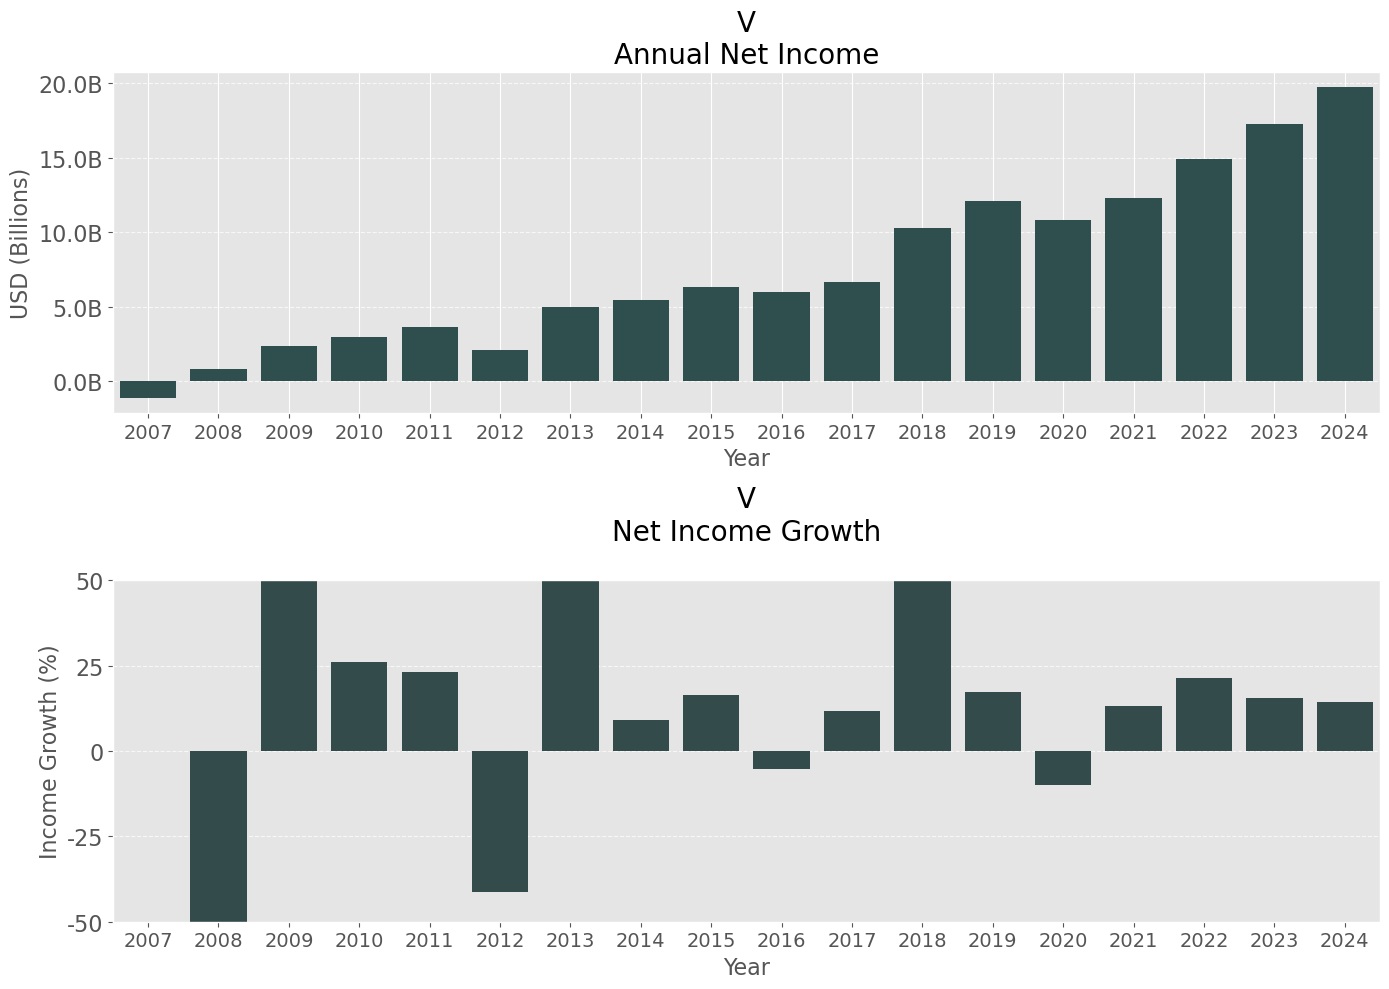

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker='V', unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker='V', ymin=-50, ymax=50, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


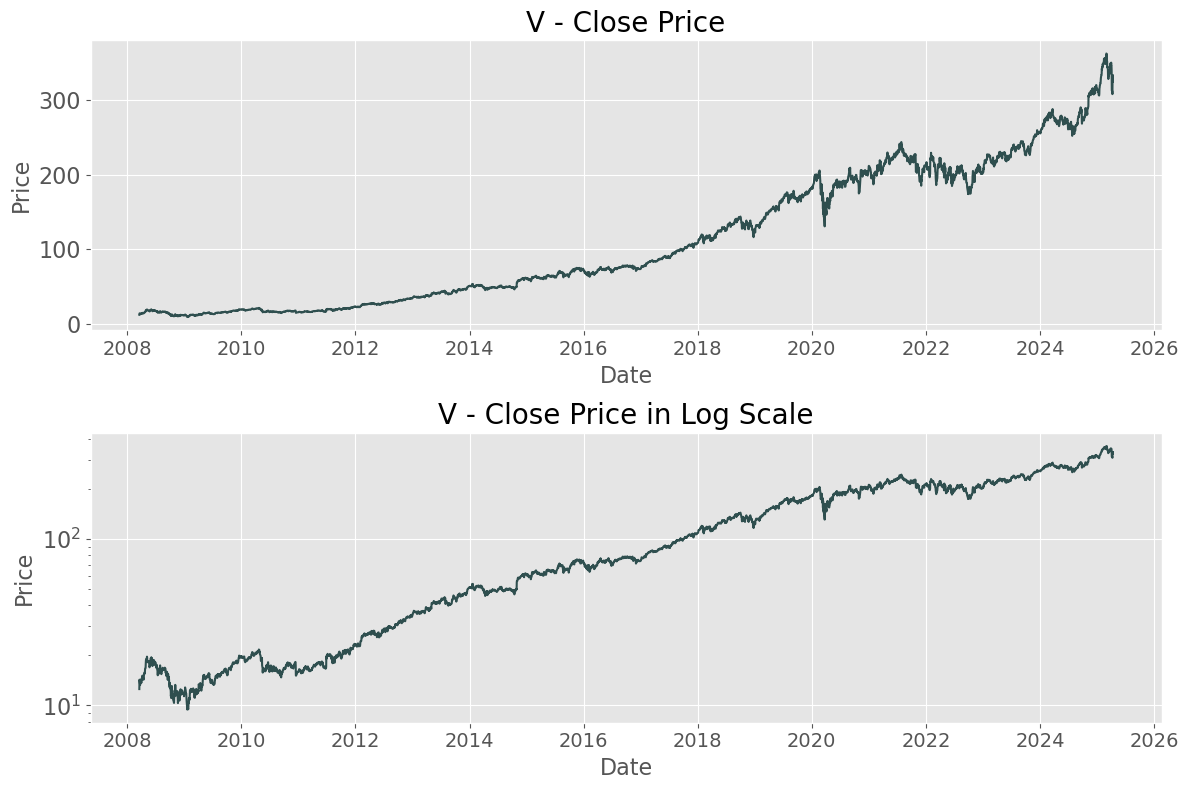

In [5]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price("V", start="2007", column="Close", scale='linear', ax=axes[0])
historical_price("V", start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)  # Show x-ticks on upper plot too
plt.tight_layout()
plt.show()


The price of Visa has been increasing steadily in the past. Long-term growth can be inspected more precisely with log-scales. 

## Dividends

In [6]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
13,2020-09-30,2664000000,2020
14,2021-09-30,2798000000,2021
15,2022-09-30,3203000000,2022
16,2023-09-30,3751000000,2023
17,2024-09-30,4217000000,2024


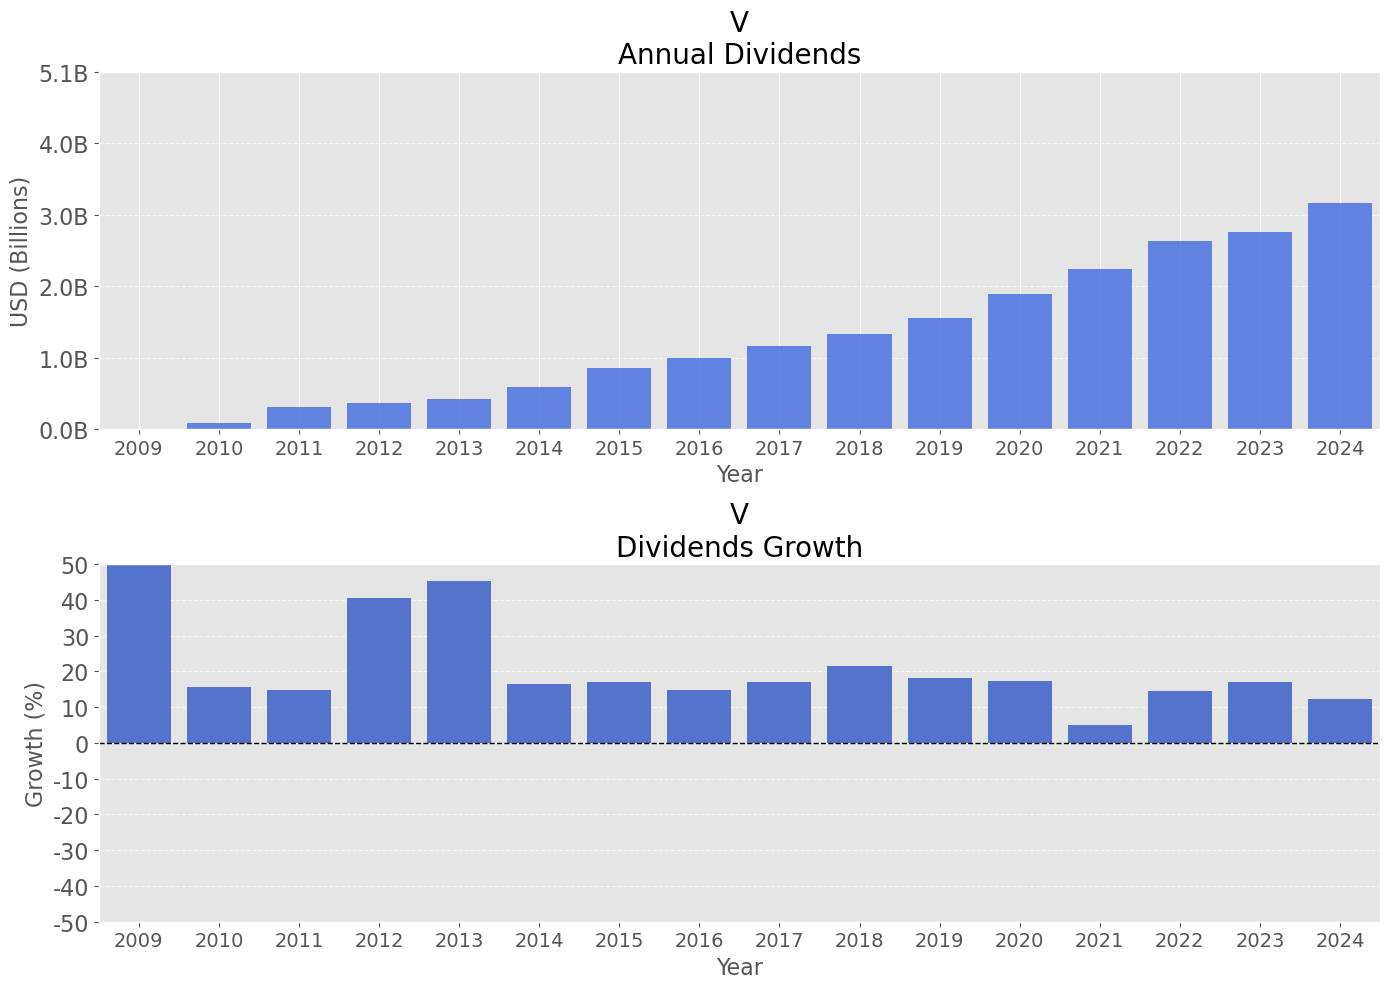

In [10]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker='V', unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker='V', ymax=50, ystep=10, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

The company has been increasing its dividend payout consistently over the years. The company has been giving dividends for 13 years, even during the pandemic. This indicates that Visa is committed to returning value to its shareholders.